# Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
std_norm = scipy.stats.norm(0,1)

import time

In [2]:
import sys, os

parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))

if parent_dir not in sys.path:
    sys.path.append(parent_dir)

from main.matrix_inverters import Gower_Richtarik_2016_1 as algo1
from main.matrix_inverters import Gower_Richtarik_2016_4 as algo4

# Define matrices

# Inversion

In [8]:
Ns = (np.linspace(1, 30, 30) * 100).astype(int)
print(Ns.min(), Ns.max())

100 3000


In [9]:
np_times = []

for n in Ns:
    total = 0
    for _ in range(10):
        A = np.matrix(std_norm.rvs((n, n)))
        start = time.time()
        _ = np.linalg.inv(A)
        total += time.time() - start
    np_times.append(total / 10)

KeyboardInterrupt: 

In [ ]:
sp_times = []

for n in Ns:
    total = 0
    for _ in range(10):
        A = np.matrix(std_norm.rvs((n, n)))
        start = time.time()
        _ = scipy.linalg.inv(A)
        total += time.time() - start
    sp_times.append(total / 10)

## Plot

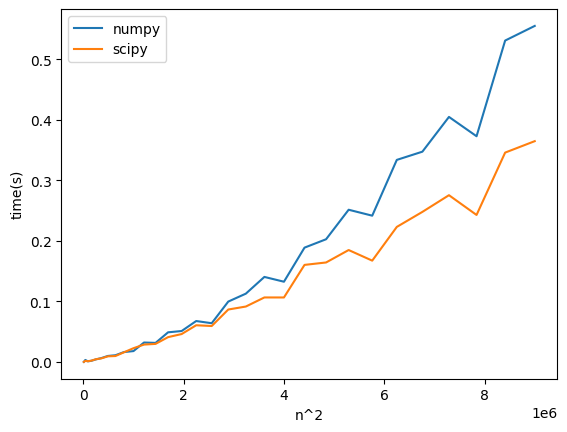

In [ ]:
plt.plot(Ns ** 2, np_times, label='numpy')
plt.plot(Ns ** 2, sp_times, label='scipy')
plt.xlabel('n^2')
plt.ylabel('time(s)')
plt.legend()
plt.show()

# PSD Inversion

In [ ]:
S = np.matrix(std_norm.rvs((4000, 4000)))
S = S.T * S
I = np.matrix(np.eye(S.shape[0]))

In [ ]:
%%timeit
scipy.linalg.inv(S)

677 ms ± 22.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%%timeit
scipy.linalg.cho_solve((scipy.linalg.cholesky(S, True), True), np.matrix(np.eye(4000)))

1.06 s ± 26.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


It seems to hold that direct inversion gets faster than cholesky as the matrix gets larger.

In [3]:
Ns = (np.linspace(1, 30, 30) * 10).astype(int)
print(Ns.min(), Ns.max())

10 300


In [4]:
sp_times = []

for n in Ns:
    total = 0
    for _ in range(10):
        A = std_norm.rvs((n, n))
        A = np.matrix(A.T @ A)
        start = time.time()
        _ = scipy.linalg.inv(A)
        total += time.time() - start
    sp_times.append(total / 10)

In [ ]:
algo4_times = []

for n in Ns:
    total = 0
    for _ in range(10):
        A = std_norm.rvs((n, n))
        A = np.matrix(A.T @ A)
        start = time.time()
        _ = algo4(A)
        total += time.time() - start
    algo4_times.append(total / 10)